# Telecom Data Churn Classification

In [251]:
# All Imports

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [252]:
# Telecom data
churn_data= pd.read_csv('churn_data.csv')

# Customer Data
customer_data = pd.read_csv('customer_data.csv')

# Internet Data
internet_data = pd.read_csv('internet_data.csv')

In [253]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [254]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [255]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [256]:
print(churn_data.shape)
print(customer_data.shape)
print(internet_data.shape)

(7043, 9)
(7043, 5)
(7043, 9)


In [257]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [258]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [259]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: object(9)
memory usage: 495.3+ KB


In [260]:
# Merge Data frames

df_1 = pd.merge(churn_data,customer_data, how='inner',on='customerID')
telecom = pd.merge(df_1,internet_data, how='inner',on='customerID')

In [261]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [262]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [263]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [264]:
# List of vraibles map

varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

#defining map function

def binary_Map(x):
    return x.map({'Yes':1,'No':0})
    
# Applying the function to telecom data
telecom[varlist] = telecom[varlist].apply(binary_Map)
    

#### For categorical featutes with multiple levels, create dummy features

In [265]:
# Create dummies for categorical features and drop the first level

dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

telecom = pd.concat([telecom,dummy1],axis=1)

telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [266]:
telecom.OnlineBackup.astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [267]:
# Creating Dummies for the remaining Categorical Variables and droping the not required levels

m1 = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
m1.drop('MultipleLines_No phone service',axis=1,inplace=True)
telecom = pd.concat([telecom,m1],axis=1)

s1 = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
s1.drop('OnlineSecurity_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,s1],axis=1)

o1 = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
o1.drop('OnlineBackup_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,o1],axis=1)

d1 = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
d1.drop('DeviceProtection_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,d1],axis=1) 

t1 = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
t1.drop('TechSupport_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,t1],axis=1) 

s2 = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
s2.drop('StreamingTV_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,s2],axis=1) 

s3 = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
s3.drop('StreamingMovies_No internet service',axis=1,inplace=True)
telecom = pd.concat([telecom,s3],axis=1) 

In [268]:
telecom.MultipleLines.astype('category').value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [269]:
telecom.drop(['Contract','PaymentMethod','gender','InternetService','MultipleLines','StreamingMovies',
              'StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity'],axis=1,inplace=True)

In [270]:
telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [271]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [272]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [273]:
num_telecom.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [274]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [275]:
# Pencentage of null da
round(telecom['TotalCharges'].isnull().sum()/len(telecom.index),4) * 100

0.16

In [276]:
# remove the records with null total charges
telecom = telecom[~np.isnan(telecom.TotalCharges)]

In [277]:
round(telecom['TotalCharges'].isnull().sum()/len(telecom.index),4) * 100

0.0

### Test Train Split


In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X = telecom.drop(['Churn','customerID'],axis=1)

In [280]:
y = telecom['Churn']

In [281]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state=42)

## Fetaures Scaling

In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [283]:
X_train[['tenure','MonthlyCharges','TotalCharges']] =scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [284]:
# Churn rate  around 27%
round(telecom['Churn'].sum()/len(telecom.index),4) * 100

26.58

## Looking at the Correlations

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

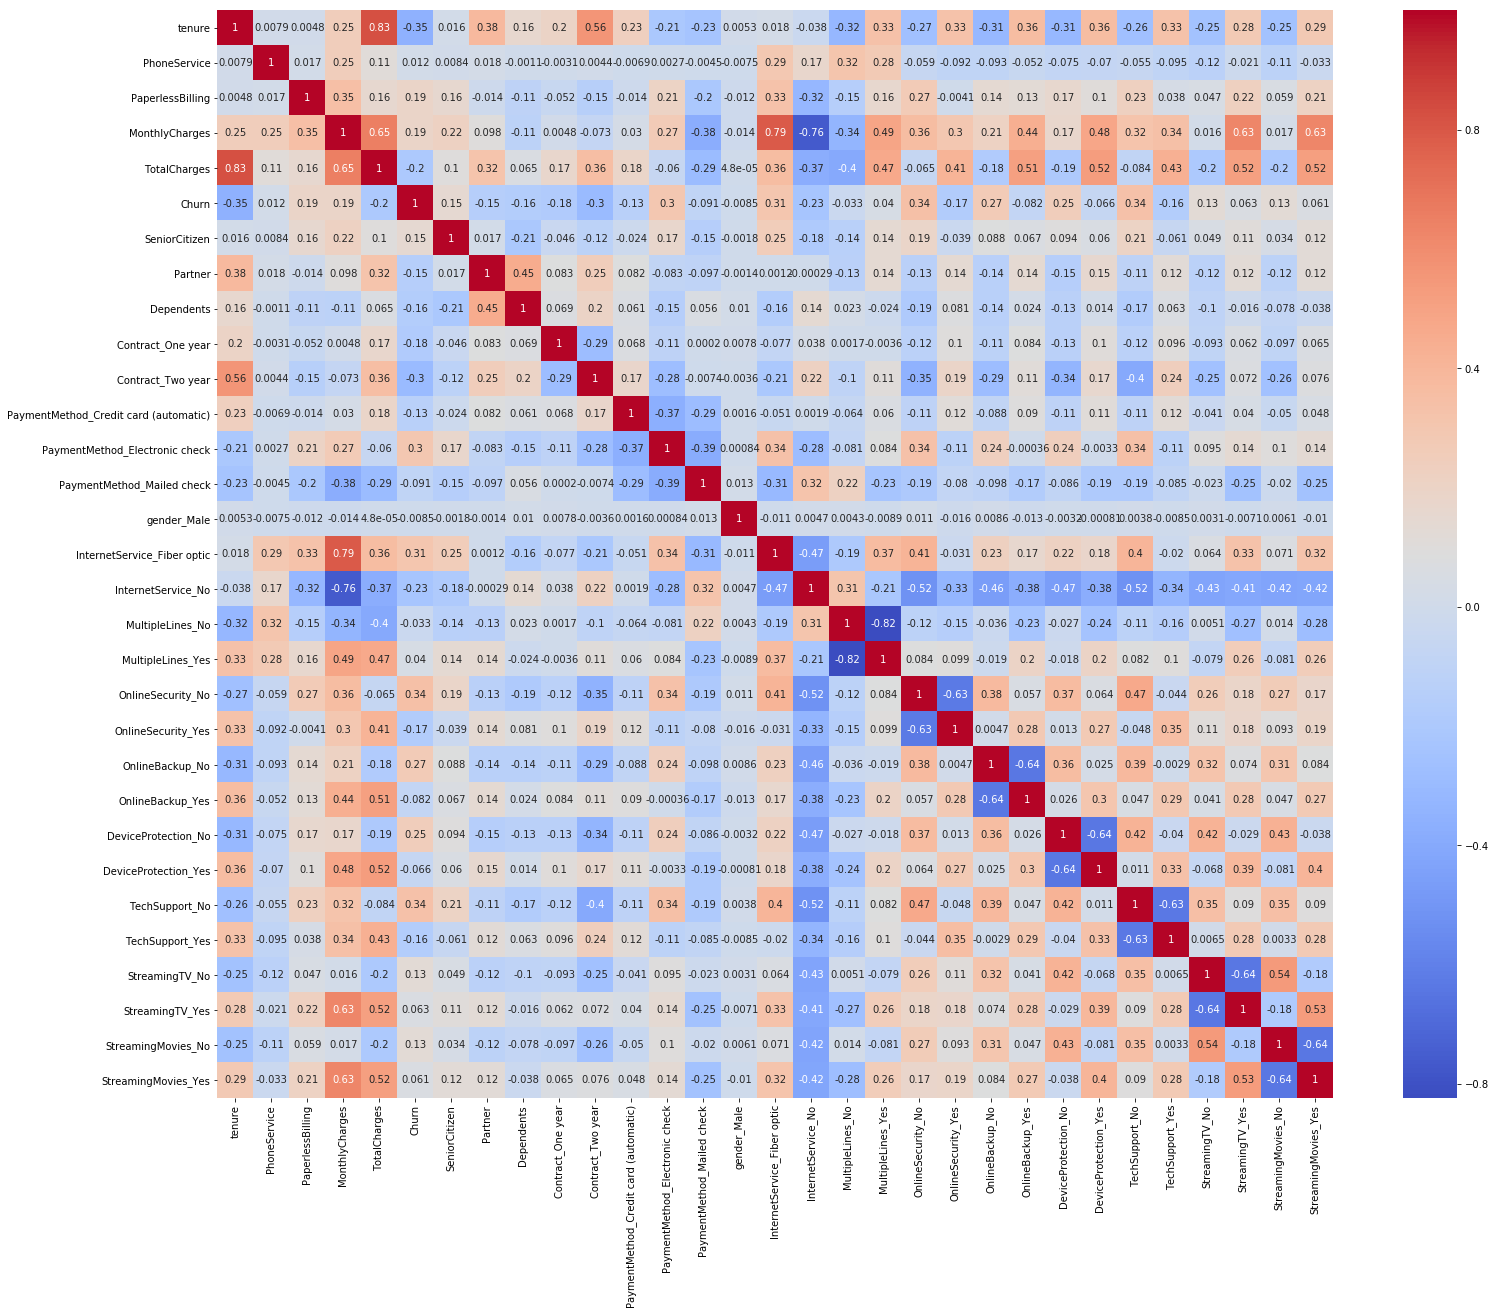

In [286]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom.corr(),annot=True,cmap='coolwarm')

In [287]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

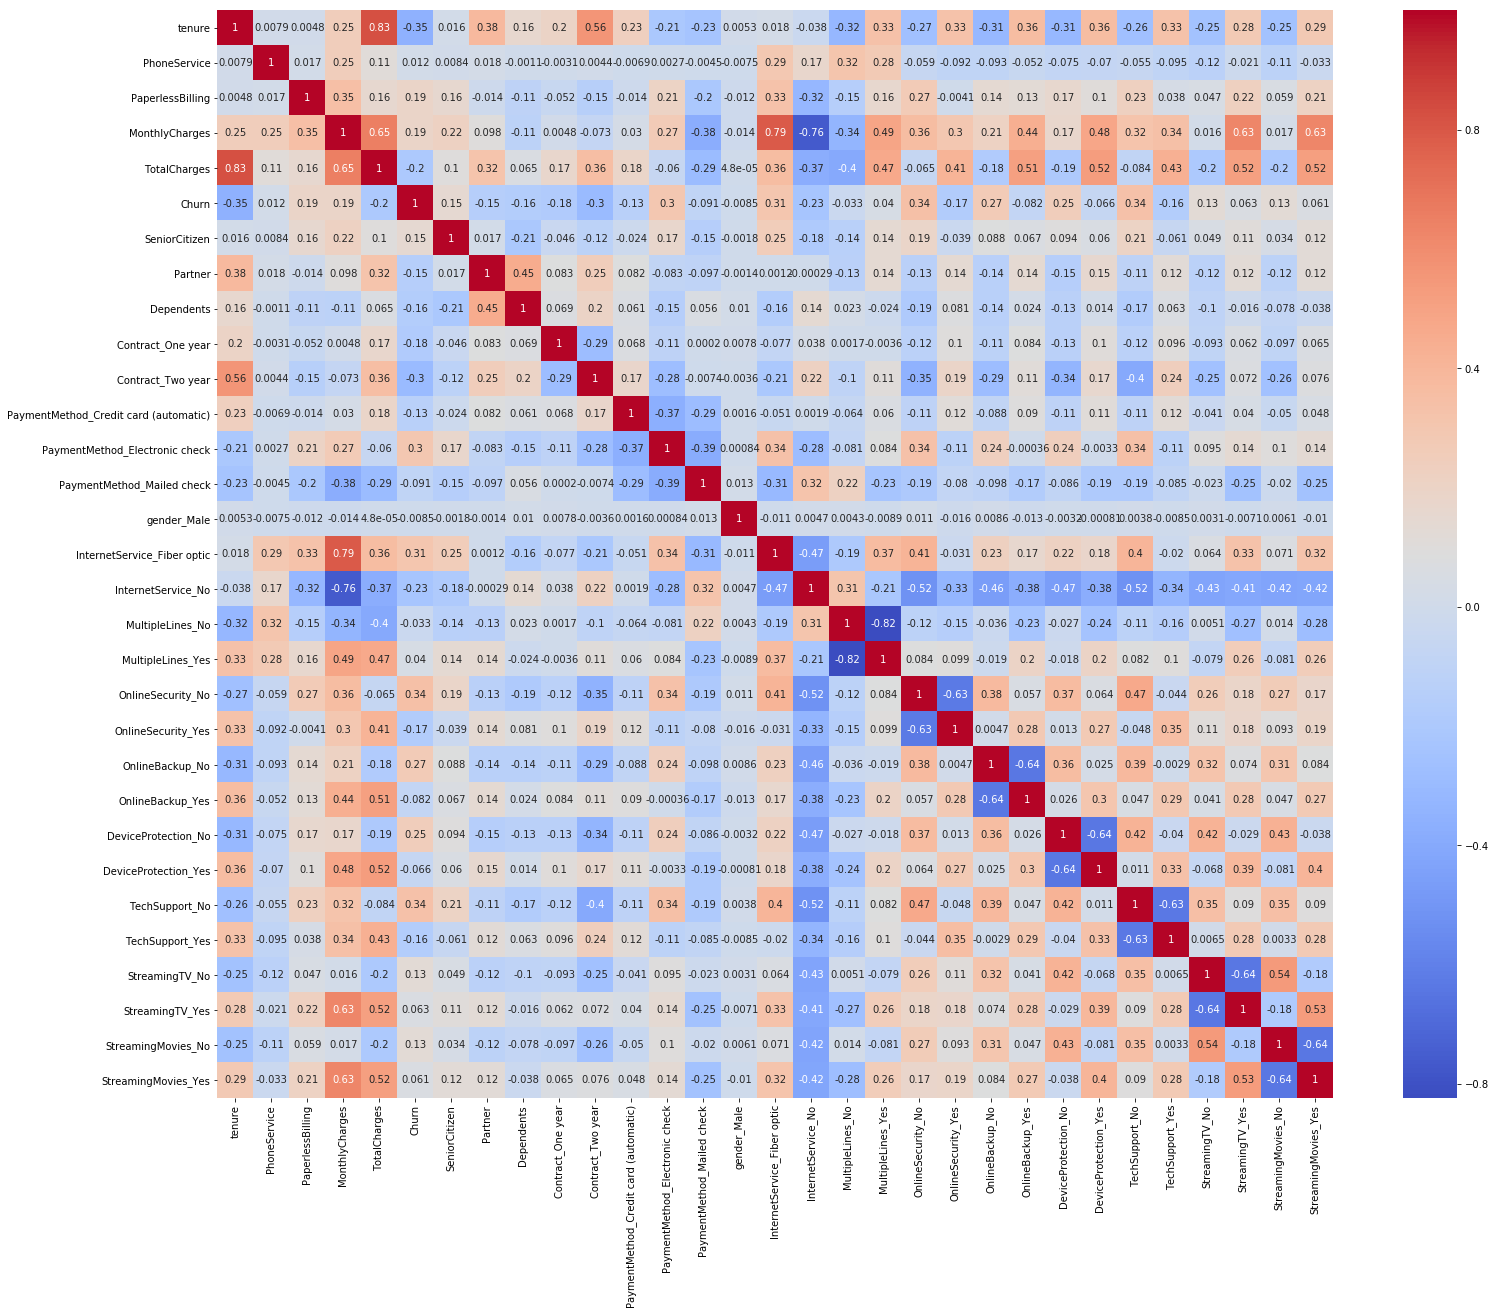

In [288]:
plt.figure(figsize=(25,20))
sns.heatmap(telecom.corr(),annot=True,cmap='coolwarm')

In [289]:
import statsmodels.api as sm

In [290]:
logm1 = sm.GLM(y_train,sm.add_constant(X_train), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Fri, 19 Jul 2019   Deviance:                       4042.2
Time:                        15:39:26   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2320      1.533     -2.108      0.035      -6.237      -0.227
tenure                                   -1.5221      0.187     -8.128      0.000      -1.889      -1.155
PhoneService                              0.5535      0.785      0.705      0.481      -0.984       2.091
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -1.6782      1.157     -1.450      0.147      -3.946       0.590
TotalCharges                              0.7688      0.194      3.956      0.000       0.388       1.150
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -2.1515      0.976     -2.204      0.028      -4.065      -0.238
MultipleLines_Yes                         0.4650      0.214      2.173      0.030       0.046       0.884
OnlineSecurity_Yes                       -0.1314      0.215     -0.610      0.542      -0.553       0.291
OnlineBackup_Yes                          0.1700      0.212      0.803      0.422      -0.245       0.585
DeviceProtection_Yes                      0.2282      0.212      1.078      0.281      -0.187       0.643
TechSupport_Yes                          -0.1000      0.218     -0.459      0.647      -0.527       0.327
StreamingTV_Yes                           0.7632      0.393      1.942      0.052      -0.007       1.534
StreamingMovies_Yes                       0.7661      0.396      1.936      0.053      -0.010       1.542
=========================================================================================================
"""

In [291]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

In [292]:
from sklearn.feature_selection import RFE
rfe = RFE(logres,15) # Coarse Tuning select 15 features through RFE

rfe = rfe.fit(X_train,y_train)

In [293]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [294]:
col = X_train.columns[rfe.support_]

In [295]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 7),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 3),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 4),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 5),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [296]:
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [297]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [298]:
# Fine Tuning Using P-value and VIF

In [299]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.6
Date:                Fri, 19 Jul 2019   Deviance:                       4053.2
Time:                        15:39:26   Pearson chi2:                 5.34e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2154      0.168     -7.219      0.000      -1.545      -0.885
tenure                            -1.4773      0.182     -8.106      0.000      -1.835      -1.120
PhoneService                      -0.5560      0.159     -3.500      0.000      -0.867      -0.245
PaperlessBilling                   0.2135      0.088      2.415      0.016       0.040       0.387
TotalCharges                       0.7119      0.188      3.791      0.000       0.344       1.080
SeniorCitizen                      0.2723      0.100      2.736      0.006       0.077       0.467
Contract_One year                 -0.8472      0.132     -6.441      0.000      -1.105      -0.589
Contract_Two year                 -1.4551      0.208     -6.994      0.000      -1.863      -1.047
PaymentMethod_Electronic check     0.3012      0.083      3.635      0.000       0.139       0.464
InternetService_Fiber optic        0.8326      0.117      7.086      0.000       0.602       1.063
InternetService_No                -0.7292      0.162     -4.510      0.000      -1.046      -0.412
MultipleLines_Yes                  0.1941      0.095      2.042      0.041       0.008       0.380
OnlineSecurity_Yes                -0.4055      0.102     -3.994      0.000      -0.604      -0.207
TechSupport_Yes                   -0.3810      0.103     -3.695      0.000      -0.583      -0.179
StreamingTV_Yes                    0.2107      0.097      2.183      0.029       0.022       0.400
StreamingMovies_Yes                0.2163      0.097      2.237      0.025       0.027       0.406
==================================================================================================
"""

In [300]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3946    0.328665
3394    0.086297
1635    0.364250
4088    0.629671
1886    0.004760
5149    0.002797
1617    0.176732
981     0.007619
3080    0.476830
4992    0.087182
dtype: float64

In [301]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_Pred':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final['Churn_Pred'].map(lambda x :1 if x >.5 else 0)

In [302]:
y_train_pred_final.head()

,Churn,Churn_Pred,CustID
3946,1,0.328665,3946
3394,0,0.086297,3394
1635,0,0.364250,1635
4088,1,0.629671,4088
1886,0,0.004760,1886


In [303]:
y_train_pred_final['predicted'] = y_train_pred_final['Churn_Pred'].map(lambda x :1 if x >.5 else 0)

In [304]:
y_train_pred_final.head(10)

,Churn,Churn_Pred,CustID,predicted
3946,1,0.328665,3946,0
3394,0,0.086297,3394,0
1635,0,0.364250,1635,0
4088,1,0.629671,4088,1
1886,0,0.004760,1886,0
5149,0,0.002797,5149,0
1617,0,0.176732,1617,0
981,0,0.007619,981,0
3080,0,0.476830,3080,0
4992,0,0.087182,4992,0


In [305]:
from sklearn import metrics

In [306]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)

print(confusion_matrix)

[[3230  384]
 [ 580  728]]


In [308]:
TN = confusion_matrix[0,0] #True -ve
FP = confusion_matrix[0,1] #False +ve
FN = confusion_matrix[1,0] #False -ve
TP = confusion_matrix[1,1] #True Postive
sensitivity = TP/(FN+TP)

specificity = TN/(TN+FP)

print('Sensitivity:',sensitivity) # Out of all the actual churns how many really identified correctly
print('Specificity:',specificity) # Out of all the actual non churns how many really identified as non-churn correctly

Sensitivity: 0.5565749235474006
Specificity: 0.8937465412285556


In [309]:
# False Positive Rate
FPR = FP/(TN+FP)
print(FPR)

0.10625345877144439


In [310]:
# Positive Predictive Value
PPV = TP/(FP+TP)
print(PPV)

0.6546762589928058


In [311]:
# Negative Predictive Rate
NPV = TN/(TN+FN)
print(NPV)

0.847769028871391


In [312]:
#Accuracy Score
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8041446566436408


In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

In [314]:
vif['Features'] = X_train[col].columns

In [315]:
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [316]:
vif

,Features,VIF
1,PhoneService,8.61
3,TotalCharges,7.69
0,tenure,6.64
8,InternetService_Fiber optic,4.06
6,Contract_Two year,3.32
9,InternetService_No,3.32
2,PaperlessBilling,2.72
13,StreamingTV_Yes,2.66
14,StreamingMovies_Yes,2.63
10,MultipleLines_Yes,2.46


In [317]:
col = col.drop('PhoneService',1)

In [318]:

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.7
Date:                Fri, 19 Jul 2019   Deviance:                       4065.4
Time:                        15:39:27   Pearson chi2:                 5.18e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5958      0.130    -12.263      0.000      -1.851      -1.341
tenure                            -1.3542      0.179     -7.577      0.000      -1.705      -1.004
PaperlessBilling                   0.2218      0.088      2.516      0.012       0.049       0.395
TotalCharges                       0.5916      0.185      3.201      0.001       0.229       0.954
SeniorCitizen                      0.2908      0.099      2.925      0.003       0.096       0.486
Contract_One year                 -0.8533      0.131     -6.490      0.000      -1.111      -0.596
Contract_Two year                 -1.4456      0.208     -6.957      0.000      -1.853      -1.038
PaymentMethod_Electronic check     0.3077      0.083      3.721      0.000       0.146       0.470
InternetService_Fiber optic        0.6911      0.109      6.345      0.000       0.478       0.905
InternetService_No                -0.8976      0.153     -5.858      0.000      -1.198      -0.597
MultipleLines_Yes                  0.1431      0.093      1.534      0.125      -0.040       0.326
OnlineSecurity_Yes                -0.4223      0.101     -4.169      0.000      -0.621      -0.224
TechSupport_Yes                   -0.3961      0.103     -3.850      0.000      -0.598      -0.194
StreamingTV_Yes                    0.2333      0.096      2.424      0.015       0.045       0.422
StreamingMovies_Yes                0.2513      0.096      2.614      0.009       0.063       0.440
==================================================================================================
"""

In [319]:
y_train_pred_final.head()

,Churn,Churn_Pred,CustID,predicted
3946,1,0.328665,3946,0
3394,0,0.086297,3394,0
1635,0,0.364250,1635,0
4088,1,0.629671,4088,1
1886,0,0.004760,1886,0


## Model Evaluation Using ROC Curve

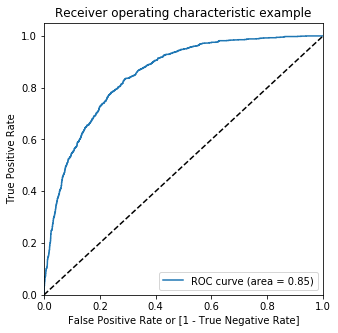

In [320]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Pred)

## Threshold Determination

In [321]:
y_train_pred_final.head()

,Churn,Churn_Pred,CustID,predicted
3946,1,0.328665,3946,0
3394,0,0.086297,3394,0
1635,0,0.364250,1635,0
4088,1,0.629671,4088,1
1886,0,0.004760,1886,0


In [322]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Pred.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Pred,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3946,1,0.328665,3946,0,1,1,1,1,0,0,0,0,0,0
3394,0,0.086297,3394,0,1,0,0,0,0,0,0,0,0,0
1635,0,0.364250,1635,0,1,1,1,1,0,0,0,0,0,0
4088,1,0.629671,4088,1,1,1,1,1,1,1,1,0,0,0
1886,0,0.004760,1886,0,1,0,0,0,0,0,0,0,0,0


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.265746  1.000000  0.000000
0.1   0.1  0.621902  0.948012  0.503874
0.2   0.2  0.706014  0.876147  0.644438
0.3   0.3  0.766558  0.775229  0.763420
0.4   0.4  0.789110  0.667431  0.833149
0.5   0.5  0.804145  0.556575  0.893747
0.6   0.6  0.799472  0.410550  0.940232
0.7   0.7  0.767371  0.178899  0.980354
0.8   0.8  0.739130  0.018349  1.000000
0.9   0.9  0.734254  0.000000  1.000000


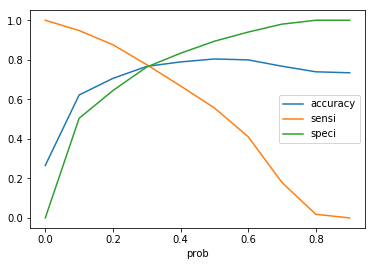

In [324]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

0.6546762589928058
0.5565749235474006


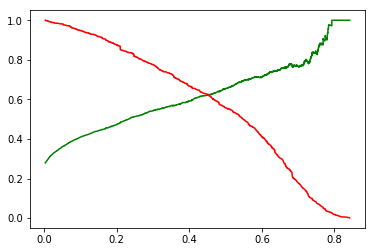

In [325]:
from sklearn.metrics import precision_score,recall_score
#Precision Score
print(precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted))
#Recall Score
print(recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Pred)

plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],'r-')
plt.show()

In [326]:
X_test[['tenure','MonthlyCharges','TotalCharges']] =scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1.178125,1,0,-1.341810,-0.351298,1,1,0,0,1,...,1,0,1,1,0,0,0,0,0,0
6784,-0.548041,1,0,-1.351809,-0.806065,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6125,-0.794636,1,1,1.233036,-0.413966,0,1,0,0,0,...,1,1,0,1,0,0,1,0,1,1
3052,0.191744,1,1,-0.340203,-0.119063,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4099,-1.082331,0,0,-1.193486,-0.939698,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [327]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [329]:
y_test_pred.head()

2481    0.004925
6784    0.110550
6125    0.684809
3052    0.120965
4099    0.248168
dtype: float64

In [330]:
#y_test_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame({'Churn':y_test.values,'Churn_Pred':y_test_pred})
y_test_df['CustID'] = y_test.index
y_test_df['predicted'] = y_test_df['Churn_Pred'].map(lambda x :1 if x >.3 else 0)

In [332]:
y_test_df.head()

,Churn,Churn_Pred,CustID,predicted
2481,0,0.004925,2481,0
6784,0,0.110550,6784,0
6125,1,0.684809,6125,1
3052,0,0.120965,3052,0
4099,0,0.248168,4099,0


In [333]:
confusion_matrix = metrics.confusion_matrix(y_test_df.Churn,y_test_df.predicted)

print(confusion_matrix)
#Accuracy Score
print(metrics.accuracy_score(y_test_df.Churn,y_test_df.predicted))

[[1166  383]
 [ 127  434]]
0.7582938388625592


In [334]:
TN = confusion_matrix[0,0] #True -ve
FP = confusion_matrix[0,1] #False +ve
FN = confusion_matrix[1,0] #False -ve
TP = confusion_matrix[1,1] #True Postive
sensitivity = TP/(FN+TP)

specificity = TN/(TN+FP)

print('Sensitivity:',sensitivity) # Out of all the actual churns how many really identified correctly
print('Specificity:',specificity) # Out of all the actual non churns how many really identified as non-churn correctly

Sensitivity: 0.7736185383244206
Specificity: 0.7527437056165268


In [335]:
(1294 + 359)/(1294+359+223+234)

0.7834123222748816

In [336]:
359/(359+223)

0.6168384879725086

In [337]:
1050/1400

0.75

In [338]:
1190/1400

0.85

In [389]:
df = pd.DataFrame({'Heart Disease':[0,1,1,0,0,0,1,1,0,1],
                 'Predicted Probability':[0.34,0.58,0.79,0.68,0.21,0.04,0.48,0.64,0.61,0.86],
                 'Predicted Label':[0,1,1,1,0,0,0,1,1,1]})

In [390]:
df['fortyf'] = df['Predicted Probability'].map(lambda x :1 if x >.45 else 0)

In [391]:
df['fif'] = df['Predicted Probability'].map(lambda x :1 if x >.5 else 0)

In [392]:
df['fif5'] = df['Predicted Probability'].map(lambda x :1 if x >.55 else 0)

In [393]:
df['six'] = df['Predicted Probability'].map(lambda x :1 if x >.6 else 0)

In [394]:
df

,Heart Disease,Predicted Probability,Predicted Label,fortyf,fif,fif5,six
0,0,0.34,0,0,0,0,0
1,1,0.58,1,1,1,1,0
2,1,0.79,1,1,1,1,1
3,0,0.68,1,1,1,1,1
4,0,0.21,0,0,0,0,0
5,0,0.04,0,0,0,0,0
6,1,0.48,0,1,0,0,0
7,1,0.64,1,1,1,1,1
8,0,0.61,1,1,1,1,1
9,1,0.86,1,1,1,1,1


In [402]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision'])
num = ['Predicted Label']
for i in num:
    print(i)
    cm1 = metrics.confusion_matrix(df['Heart Disease'], df[i])
    print(cm1)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision]
print(cutoff_df)

Predicted Label
[[3 2]
 [1 4]]
                            prob  accuracy  sensi  speci  precision
Predicted Label  Predicted Label       0.7    0.8    0.6   0.666667


In [400]:
4/6

0.6666666666666666